## **Retail Sales Analysis**

In [48]:
import pandas as pd
import numpy as np
import scipy
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Accessing**

### Pertanyaan Analisis yang bisa dibuat berdasarkan data yaitu

- Produk apa yang paling sering dibeli?
- Kapan puncak penjualan terjadi?
- Pada tiap bulan, barang apa saja yang paling banyak dibeli?
- Apakah ada korelasi antara gender dan umur dan juga kuantitas serta kategori barang yang dibeli?
- Produk apa yang paling sering dibeli secara bersamaan?
- Siapa saja pelanggan setia dengan jumlah frekuensi belanja tertinggi?

In [49]:
df = pd.read_csv('D:\My AI Project\Retail Sales Analysis\\retail_sales_dataset.csv')
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_5748\2540090725.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('D:\My AI Project\Retail Sales Analysis\\retail_sales_dataset.csv')


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [50]:
#Cari info tentang data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### **Data Cleaning**

In [51]:
#Cek keberadaan NA Value
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [52]:
#Cek Outlier, buat fungsinya terlebih dahulu
def check_outlier(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3-Q1
    outlier = df[(df[column_name] < Q1 - 1.5*IQR)| (df[column_name]> Q3 + 1.5*IQR)]
    return outlier

#Cek kolom yang bernilai integer
numerical_features = [x for x in df.columns if df[x].dtype == 'int64']
print(numerical_features)


#Buang kolom ID
numerical_features.remove('Transaction ID')

#Cetak kolom fitur numerik yang final
print(numerical_features)


['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']
['Age', 'Quantity', 'Price per Unit', 'Total Amount']


In [53]:
#Cek kolom fitur numerik, dan buat sebuah dictionary yang berisi nama kolom sebagai key
#  dan nilai yang tergolong outlier sebagai values. 
outliers_dict = {}

for x in numerical_features:
    outliers = check_outlier(df,x)
    if not outliers.empty:
        outliers_dict[x] = outliers.values.tolist()

print(outliers_dict)

{}


Berdasarkan dari fungsi yang telah di apply kepada kolom-kolom yang memiliki data numerik, tidak ada nilai outlier

Sekarang kita cek kolom tanggal dan ubah tipe datanya dari yang awalnya 'object64' menjadi 'datetime'

In [54]:
#Ubah format tipe data
df['Date'] = pd.to_datetime(df['Date'])
df['Gender'] = df['Gender'].astype(str)

#Cek format tipe data
print(f'Tipe data dari kolom Date adalah "{df['Date'].dtypes}')
print(f'Tipe data dari kolom Date adalah "{df['Gender'].dtypes}')


Tipe data dari kolom Date adalah "datetime64[ns]
Tipe data dari kolom Date adalah "object


In [55]:
#Save dataset sebagai dataset yang sudah di clean "Cleaned Dataset"
df.to_csv('Clean Dataset.csv')

## **Exploratory Data Analysis & Feature Engineering** 

In [56]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [57]:
#Bagi kolom tanggal menjadi tiga bagian, yaitu kolom hari, bulan dan tahun
df['Days'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#Ubah bulan dari data angka menjadi nama bulannya (string)
month_dict = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}
#Petakan ke kolom bulan
df['Month'] = df['Month'].map(month_dict)

print(df)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
0                 1 2023-11-24     CUST001    Male   34           Beauty   
1                 2 2023-02-27     CUST002  Female   26         Clothing   
2                 3 2023-01-13     CUST003    Male   50      Electronics   
3                 4 2023-05-21     CUST004    Male   37         Clothing   
4                 5 2023-05-06     CUST005    Male   30           Beauty   
..              ...        ...         ...     ...  ...              ...   
995             996 2023-05-16     CUST996    Male   62         Clothing   
996             997 2023-11-17     CUST997    Male   52           Beauty   
997             998 2023-10-29     CUST998  Female   23           Beauty   
998             999 2023-12-05     CUST999  Female   36      Electronics   
999            1000 2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount  Days     Month  Year  
0           3      

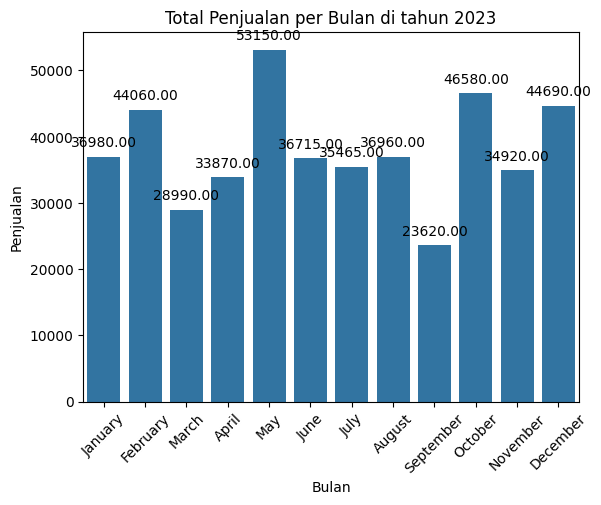

In [58]:
#Visualisasikan penjualan
month_order = ['January','February','March', 'April', 'May', 'June','July','August','September', 'October','November','December']

sales_by_month = df.groupby('Month')['Total Amount'].sum().reindex(month_order)

ax = sns.barplot(x = sales_by_month.index,y = sales_by_month.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width() / 2, p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0,10),
    textcoords = 'offset points')

plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Penjualan')
plt.title('Total Penjualan per Bulan di tahun 2023')
plt.show()

In [59]:
sales_df = sales_by_month.to_frame(name='Total Amount')
sales_df = sales_df.reset_index()
print(sales_df)

        Month  Total Amount
0     January         36980
1    February         44060
2       March         28990
3       April         33870
4         May         53150
5        June         36715
6        July         35465
7      August         36960
8   September         23620
9     October         46580
10   November         34920
11   December         44690


Berdasarkan dari visualisasi data, kita bisa melihat bahwa penjualan tertinggi ada di bulan Mei. Dengan total pendapatan 53150 dollar. 

Barang apa saja yang sering dibeli orang di bulan Mei yang menyebabkan pendapatan meningkat drastis dibandingkan bulan-bulan sebelumnya?

Product Category      Month    Beauty  Clothing  Electronics
0                   January  0.311558  0.361809     0.326633
1                  February  0.317757  0.350467     0.331776
2                     March  0.262887  0.572165     0.164948
3                     April  0.322430  0.434579     0.242991
4                       May  0.250965  0.374517     0.374517
5                      June  0.335025  0.340102     0.324873
6                      July  0.397727  0.255682     0.346591
7                    August  0.273128  0.343612     0.383260
8                 September  0.294118  0.352941     0.352941
9                   October  0.329365  0.293651     0.376984
10                 November  0.307317  0.336585     0.356098
11                 December  0.299517  0.256039     0.444444


C:\Users\INTEL\AppData\Local\Temp\ipykernel_5748\94420926.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_month_category = df.groupby(['Month', 'Product Category'])['Quantity'].sum().unstack()


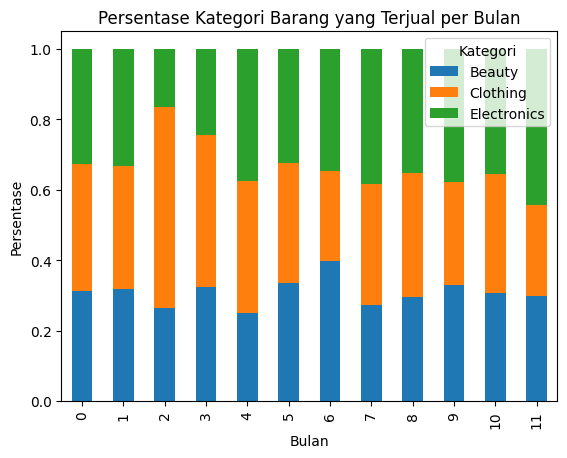

In [60]:
#Urutkan bulan dengan urutan berdasarkan list berikut
df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

#Kumpulkan data berdasarkan bulan, jenis produk dan juga kuantitas barang yang terjual
sales_by_month_category = df.groupby(['Month', 'Product Category'])['Quantity'].sum().unstack()

#buat persentase penjualan
sales_percentage_df = sales_by_month_category.div(sales_by_month_category.sum(axis = 1),axis = 0)
sales_percentage_df = sales_percentage_df.reset_index()
print(sales_percentage_df)
#Buat visualisasinya dalam bentuk stacked bar
sales_percentage_df.plot(kind='bar',stacked = True)
#for c in ax.containers:
#    for p in c:
#        height = p.get_height()
#        ax.annotate(f'{height:.1%}', xy=(p.get_x() + p.get_width()/2, height *1.1),
#rotation=90,
#ha = 'center',
#va = 'bottom',
#fontsize= 8)

plt.title('Persentase Kategori Barang yang Terjual per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Persentase')
plt.legend(title='Kategori')
plt.show()

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


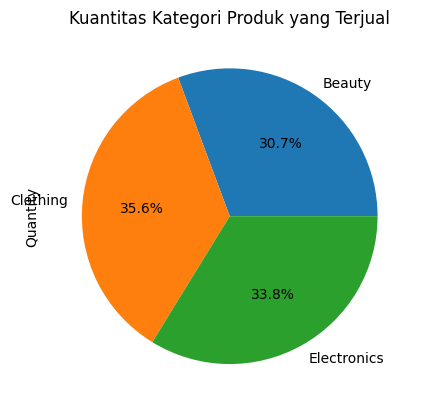

In [61]:
#Cek nilai unik dari produk category
unique_category = df["Product Category"].unique()
unique_category
#Visualisasikan kuantitas dari tiap kategori
quantity_each_category = df.groupby('Product Category')['Quantity'].sum()
print(quantity_each_category)

#Buat visualisasi datanya
df.groupby('Product Category')['Quantity'].sum().plot.pie(autopct='%1.1f%%')
plt.title('Kuantitas Kategori Produk yang Terjual')
plt.show()

Berdasarkan Pie Chart, kita tahu bahwa pakaian merupakan barang yang paling banyak dibeli. Meskipun kategori lain seperti barang elektronik dan juga kosmetik memiliki kuantitas yang tidak berbeda jauh.

   Gender  count
0  Female    510
1    Male    490


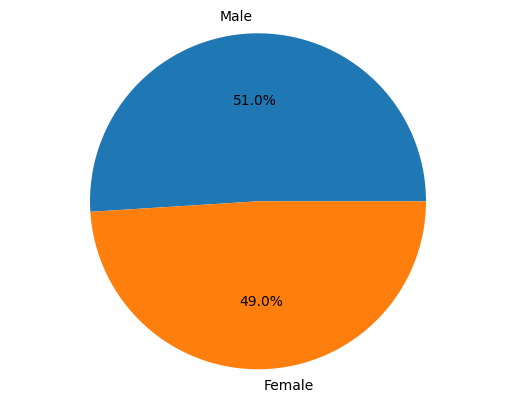

In [62]:
#Lakukan visualisasi untuk data gender. 
# Gender apa yang mendominasi dalam melakukan pembelanjaan di toko kita
gender = df['Gender'].unique()
gender_count = df['Gender'].value_counts()
gender_count_df = gender_count.to_frame().reset_index()
print(gender_count_df)
plt.pie(gender_count, labels = gender, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


Berdasarkan data, kita tahu bahwa antara pria lebih banyak melakukan transaksi di toko ini, dibandingkan wanita, meskipun perbedaannya tidak jauh

47


C:\Users\INTEL\AppData\Local\Temp\ipykernel_5748\374291591.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(df['Age'].value_counts(),palette=sns.color_palette('rocket'))
C:\Users\INTEL\AppData\Local\Temp\ipykernel_5748\374291591.py:6: UserWarning: 
The palette list has fewer values (6) than needed (47) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(df['Age'].value_counts(),palette=sns.color_palette('rocket'))


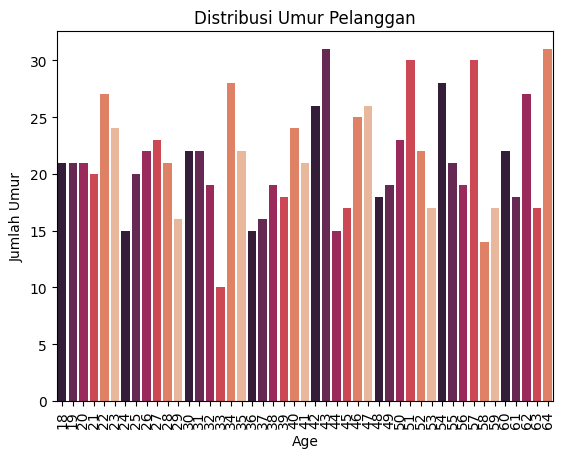

In [63]:
#Lakukan visualisasi untuk data umur pelanggan yang membeli produknya di toko ini
#Lakukan binning data

age_unique = list(df['Age'].unique())
print(len(age_unique)) 
ax = sns.barplot(df['Age'].value_counts(),palette=sns.color_palette('rocket'))
plt.title('Distribusi Umur Pelanggan')
plt.ylabel('Jumlah Umur')
plt.xticks(rotation=90)
plt.show()
#Buat anotasi
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
    (p.get_x() + p.get_width() / 2, p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0,10),
    textcoords = 'offset points')


C:\Users\INTEL\AppData\Local\Temp\ipykernel_5748\786897158.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sale_by_gender = df.groupby(['Gender', 'Month'])['Quantity'].sum().reset_index()


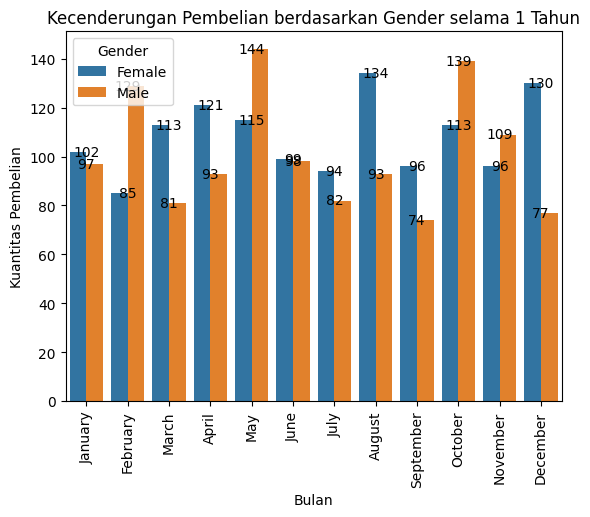

In [64]:
#Lakukan analisis terhadap gender yang paling banyak melakukan pembelian di tahun 2023
df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)
sale_by_gender = df.groupby(['Gender', 'Month'])['Quantity'].sum().reset_index()

#Lakukan visualisasi 
sns.barplot(x='Month', y = 'Quantity', hue = 'Gender', data = sale_by_gender)
plt.title('Kecenderungan Pembelian berdasarkan Gender selama 1 Tahun')
plt.xlabel('Bulan')
plt.ylabel('Kuantitas Pembelian')
plt.xticks(rotation=90)

for i in range(len(sale_by_gender)):
    x = sale_by_gender['Month'].iloc[i]
    height = sale_by_gender['Quantity'].iloc[i]
    plt.annotate(f'{height}', xy=(x,height),ha = 'center', va='center')


In [65]:
#Buat sebuah filter
def filter(dataset,category):
    return df[df['Product Category'] == category]

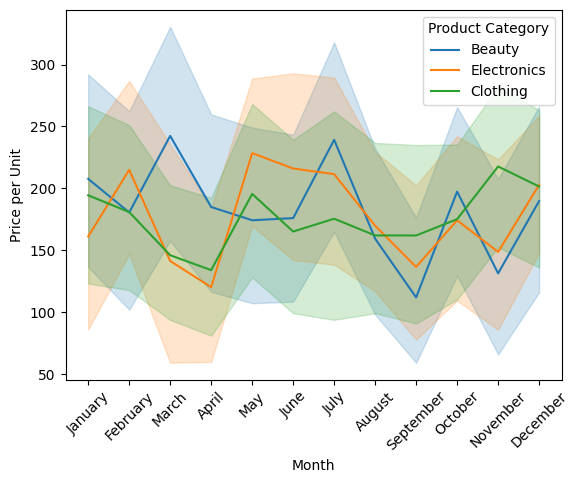

In [66]:
# Cek fluktuasi harga barang dalam waktu tertentu.
beauty_df = filter(df,'Beauty')
elect_df = filter(df,'Electronic')
cloth_df = filter(df,'Clothing')

#Atur format bulan agar datanya sesuai
df['Month'] = pd.Categorical(df['Month'], categories = month_order, ordered = True)

#Mengurutkan datanya berdasarkan kolom bulan
df = df.sort_values(by='Month')

#Buat visualisasinya
sns.lineplot(x = 'Month', y ='Price per Unit', hue = 'Product Category', data =df)
plt.xticks(rotation=45)
# Menampilkan grafik
plt.show() 

In [67]:
df.to_csv('Clean Dataset.csv')

### **Statistical Analysis**

In [68]:
# Kita lakukan uji normalitas pada data sales. 
from scipy  import stats

In [69]:
print(df)

     Transaction ID       Date Customer ID  Gender  Age Product Category  \
188             189 2023-01-30     CUST189    Male   63           Beauty   
133             134 2023-01-25     CUST134    Male   49      Electronics   
844             845 2023-01-06     CUST845    Male   54         Clothing   
224             225 2023-01-11     CUST225  Female   57           Beauty   
437             438 2023-01-19     CUST438  Female   42         Clothing   
..              ...        ...         ...     ...  ...              ...   
915             916 2023-12-24     CUST916  Female   32      Electronics   
335             336 2023-12-12     CUST336  Female   52           Beauty   
111             112 2023-12-02     CUST112    Male   37         Clothing   
495             496 2023-12-14     CUST496    Male   23         Clothing   
938             939 2023-12-18     CUST939  Female   46      Electronics   

     Quantity  Price per Unit  Total Amount  Days     Month  Year  
188         1      

### **Uji Normalitas Shapiro-Wilk**

In [70]:
columns = [x for x in df.columns if df[x].dtype == 'int64']
columns.remove('Transaction ID')
print(columns)

#Cek kolom yang ingin dicek normalitasnya
for column in columns:
    stat,p = stats.shapiro(df[column])
    print(f'Hasil uji Normalitas pada {column} ==> {stat}, p-value = {p}')
    alpha = 0.05
    if p > alpha:
        print(f'Data mengikuti distribusi normal')
    else:
        print(f'Data tidak mengikuti distribusi normal')

['Age', 'Quantity', 'Price per Unit', 'Total Amount']
Hasil uji Normalitas pada Age ==> 0.9524148791153468, p-value = 1.823399821242262e-17
Data tidak mengikuti distribusi normal
Hasil uji Normalitas pada Quantity ==> 0.8518440340605297, p-value = 1.3522297082369375e-29
Data tidak mengikuti distribusi normal
Hasil uji Normalitas pada Price per Unit ==> 0.723621149139567, p-value = 1.0552305680694026e-37
Data tidak mengikuti distribusi normal
Hasil uji Normalitas pada Total Amount ==> 0.7489105489094255, p-value = 2.178584754549033e-36
Data tidak mengikuti distribusi normal


Kita tahu bahwa data-data numerik tidak mengikuti distribusi normal. Maka dari itu kita bisa melakukan transformasi data atau mengubah penggunaan metode statistik dari yang parametrik menjadi non-parametrik

### **Korelasi Spearman-Rho**

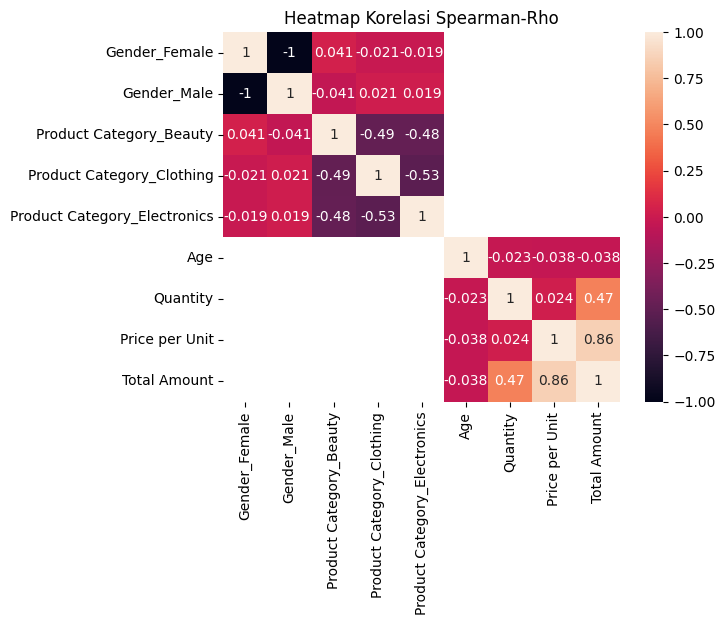

In [71]:
from scipy.stats import spearmanr
from sklearn.preprocessing import OneHotEncoder

#Definisikan fitur kategorikal
categorical_features  = ['Gender', 'Product Category']

#definisikan encoder
encoder = OneHotEncoder()

#Lakukan encoding data pada kolom gender dan kategori produk
categorical_encoded = encoder.fit_transform(df[categorical_features])
df_categorical_encoded = pd.DataFrame(categorical_encoded.toarray(), columns = encoder.get_feature_names_out(categorical_features))

#Buat dataframe tersendiri untuk kolom numerik                                      
df_numeric = df[numerical_features]
concat_corr = pd.concat([df_categorical_encoded, df_numeric])

#Lakukan korelasi
data_corr = concat_corr.corr(method='spearman')
sns.heatmap(data_corr, annot = True, cmap='rocket')
plt.title('Heatmap Korelasi Spearman-Rho')
plt.show()



Berdasarkan hasil analisis korelasi Spearman, kita tahu bahwa variabel Price per Unit/Harga per Unit barang memiliki korelasi positif kuat dengan total amount atau jumlah pendapatan yang didapat oleh toko. Variabel kuantitas memiliki hubungan korelasi positif lemah dengan Total Amount. Sisanya berkorelasi negatif dengan Total Amount. 

## **Kesimpulan**


* 1.Penjualan tertinggi ada pada bulan **Mei 2023** dan pembeli yang banyak melakukan transaksi adalah pria sebanyak **144 transaksi**.
* 2.Total transaksi yang dilakukan di toko retail berjumlah **1000 transaksi**
* 3.Pendapatan tertinggi yang diraih oleh toko retail berada pada bulan Mei dengan jumlah **53150 USD**
* 4.Berdasarkan hasil analisis korelasi Spearman, diketahui bahwa variabel yang memiliki korelasi positif kuat hanyalah variabel **Price per Unit** dengan **Total Amount (Total Harga)**. Sisanya berkorelasi positif lemah.
* 5.Berdasarkan hasil analisis, produk yang terjual didominasi oleh produk **pakaian/clothing** dengan persentase **35.6%**, dilanjutkan dengan produk elektronik sebanyak **33.8%** dan terakhir adalah produk kosmetik/beauty dengan persentase **30.7%**